#### In this notebouk, we will load data from bigquerry at first. Then, we will carry out a time series analysis. Subsequently, we will test forecasting models.

In [ ]:
from time_series import * 
# import libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from datetime import datetime, date 
import math
import pmdarima as pm

In [ ]:
project_id = "XXXXXXXXX"
database_id = "XXXXXXXX"
table_name = "XXXXXXXX"

In [ ]:
# load data from bigquery
annual_weather_pollutants = load_table_bq(project_id, database_name, table_name )
monthly_weather_pollutants = load_table_bq(project_id, database_name, table_name )
daily_weather_pollutants = load_table_bq(project_name, database_name, table_name )

#### The dataset loaded from BigQuery has already undergone transformations and cleaning.

In [32]:
daily_weather_pollutants

,con_timestamp,no2_ugm3,pm10_ugm3,pm2p5_ugm3
0,2018-01-01,5.606747,3.536338,13.854821
1,2018-01-02,9.576184,12.537969,11.598293
2,2018-01-03,4.410677,6.606177,25.571468
3,2018-01-04,6.537595,4.136699,11.213423
4,2018-01-05,10.298927,4.296805,11.243767
...,...,...,...,...
1821,2022-12-27,8.443784,10.835070,8.487411
1822,2022-12-28,4.423929,9.352987,4.658409
1823,2022-12-29,5.632095,26.626911,5.497128
1824,2022-12-30,4.746635,15.732126,3.958102


# Visualize monthly concentrations 

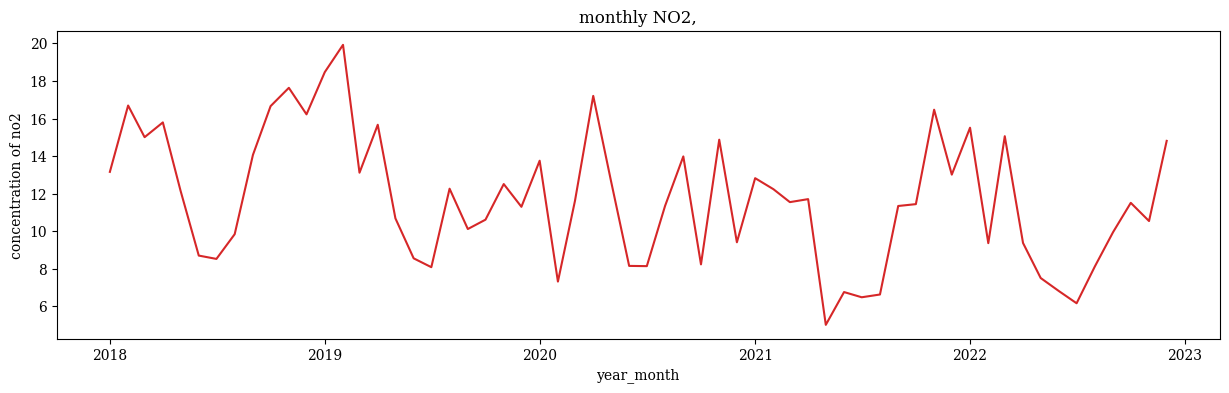

In [152]:
visualize_plt(monthly_avg_pollutants, x=monthly_avg_pollutants['date_pollutant'], y=monthly_avg_pollutants['NO2_avg_ugm3'], title='monthly NO2,', xlabel='year_month', ylabel="concentration of no2", color='red')

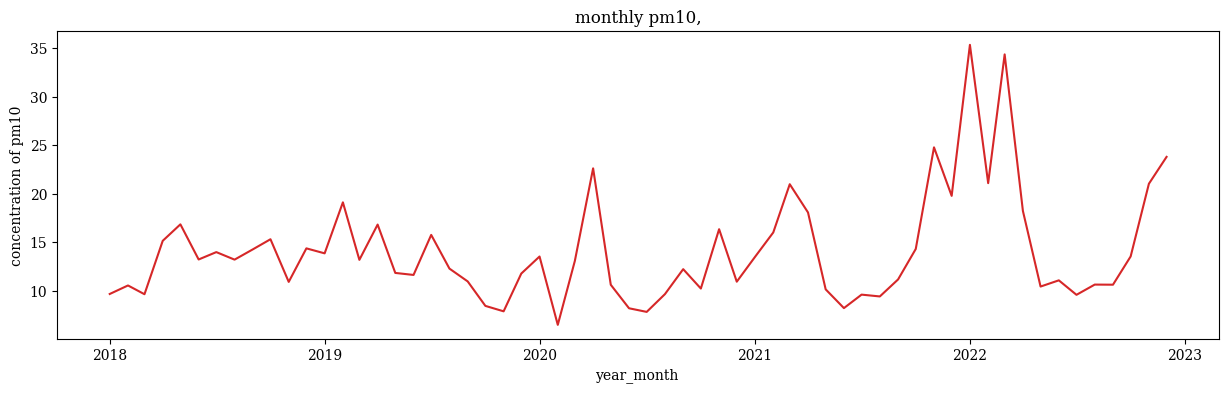

In [196]:
visualize_plt(monthly_avg_pollutants, x=monthly_avg_pollutants['date_pollutant'], y=monthly_avg_pollutants['PM10_avg_ugm3'], title='monthly pm10,', xlabel='year_month', ylabel="concentration of pm10", color='red')

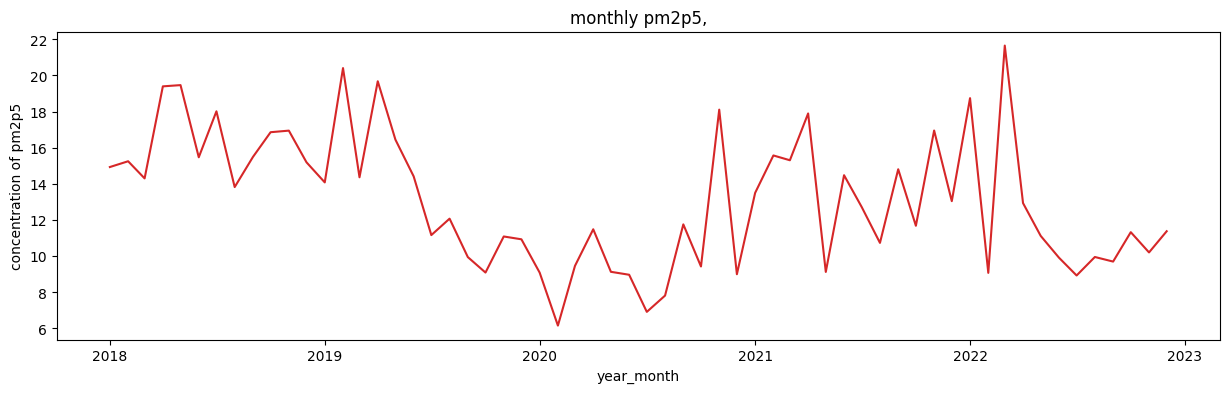

In [151]:
visualize_plt(monthly_avg_pollutants, x=monthly_avg_pollutants['date_pollutant'], y=monthly_avg_pollutants['PM2p5_avg_ugm3'], title='monthly pm2p5,', xlabel='year_month', ylabel="concentration of pm2p5", color='red')


* strong concentration for the start of 2022
* peaks are always at the beginning of the year (December and January)

# Visualize daily concentrations

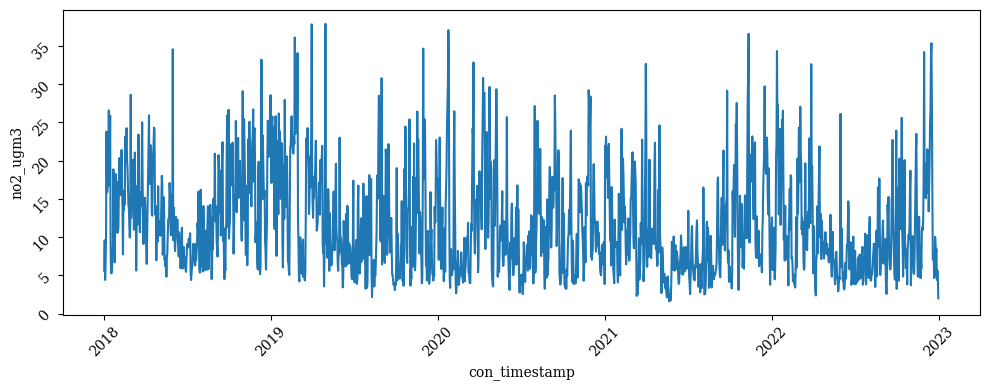

In [197]:
visualize_sns_plt(daily_weather_pollutants[['con_timestamp', 'no2_ugm3']], "con_timestamp", "no2_ugm3")

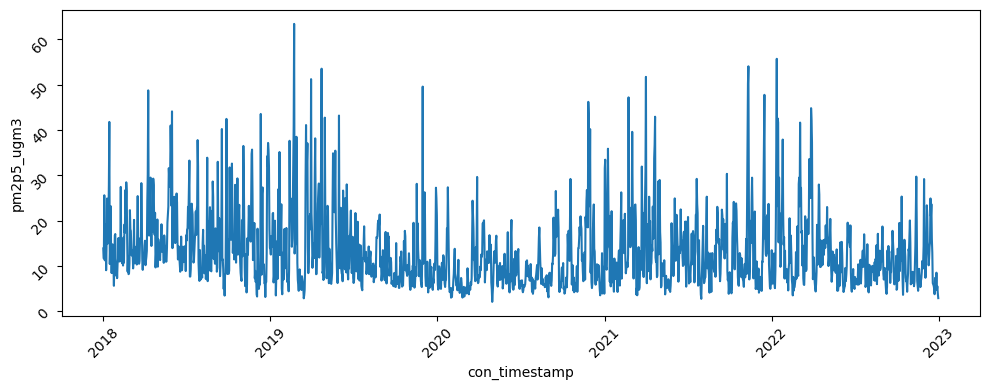

In [163]:
visualize_sns_plt(daily_weather_pollutants[['con_timestamp', 'pm2p5_ugm3']], "con_timestamp", "pm2p5_ugm3")

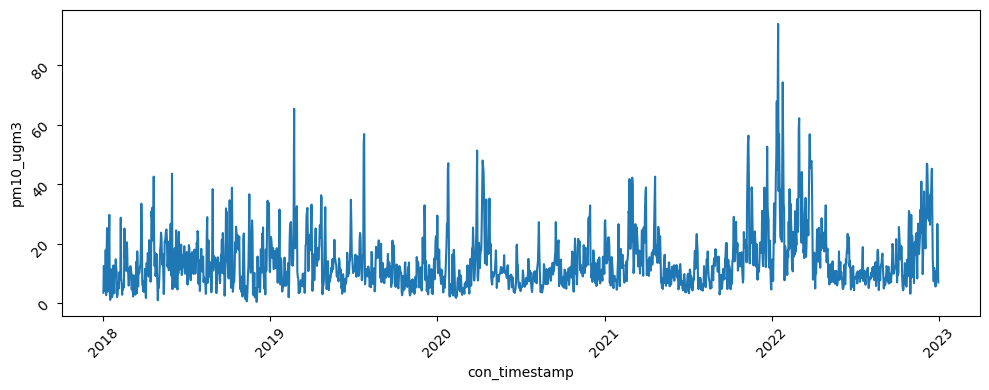

In [162]:
visualize_sns_plt(daily_weather_pollutants[['con_timestamp', 'pm10_ugm3']], "con_timestamp", "pm10_ugm3")

### Explications : 
* The variations in concentrations of different pollutants show a similar trend over the chosen temporal period, with differences in the peaks observed. 
* PM10 stands out with significantly higher concentrations compared to the others
* back-to-school period, summer, autumn, Christmas, winter, and spring holidays contribute to increased road traffic -->increase air pollution


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


<AxesSubplot:xlabel='no2_ugm3', ylabel='Density'>

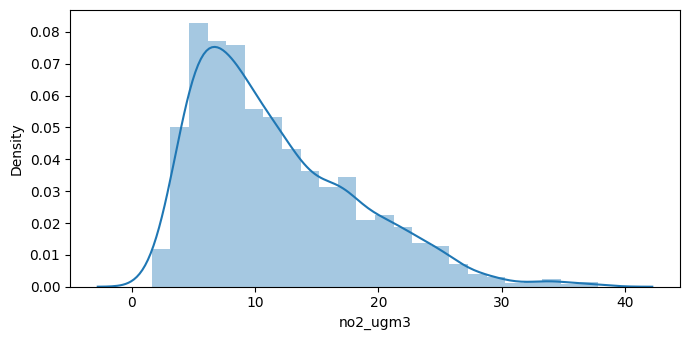

In [164]:
#histogram
plt.rcParams["figure.figsize"] = [7, 3.5]
plt.rcParams["figure.autolayout"] = True
sns.distplot(daily_weather_pollutants['no2_ugm3'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='pm10_ugm3', ylabel='Density'>

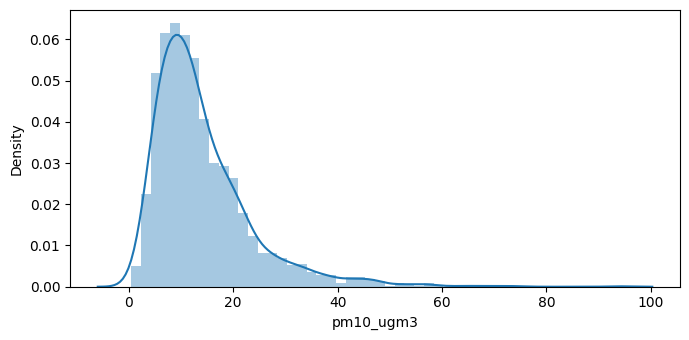

In [60]:
sns.distplot(daily_weather_pollutants['pm10_ugm3'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='pm2p5_ugm3', ylabel='Density'>

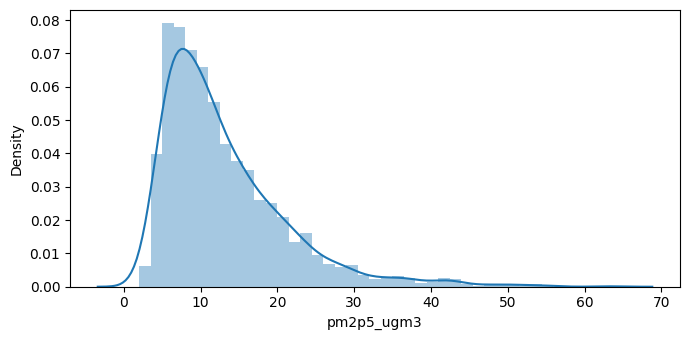

In [61]:
sns.distplot(daily_weather_pollutants['pm2p5_ugm3'])

# Time Series decomposition

***Decomposition 
* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series

***we use multiplicative models when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. In the additive model, the magnitude of seasonality does not change in relation to time.


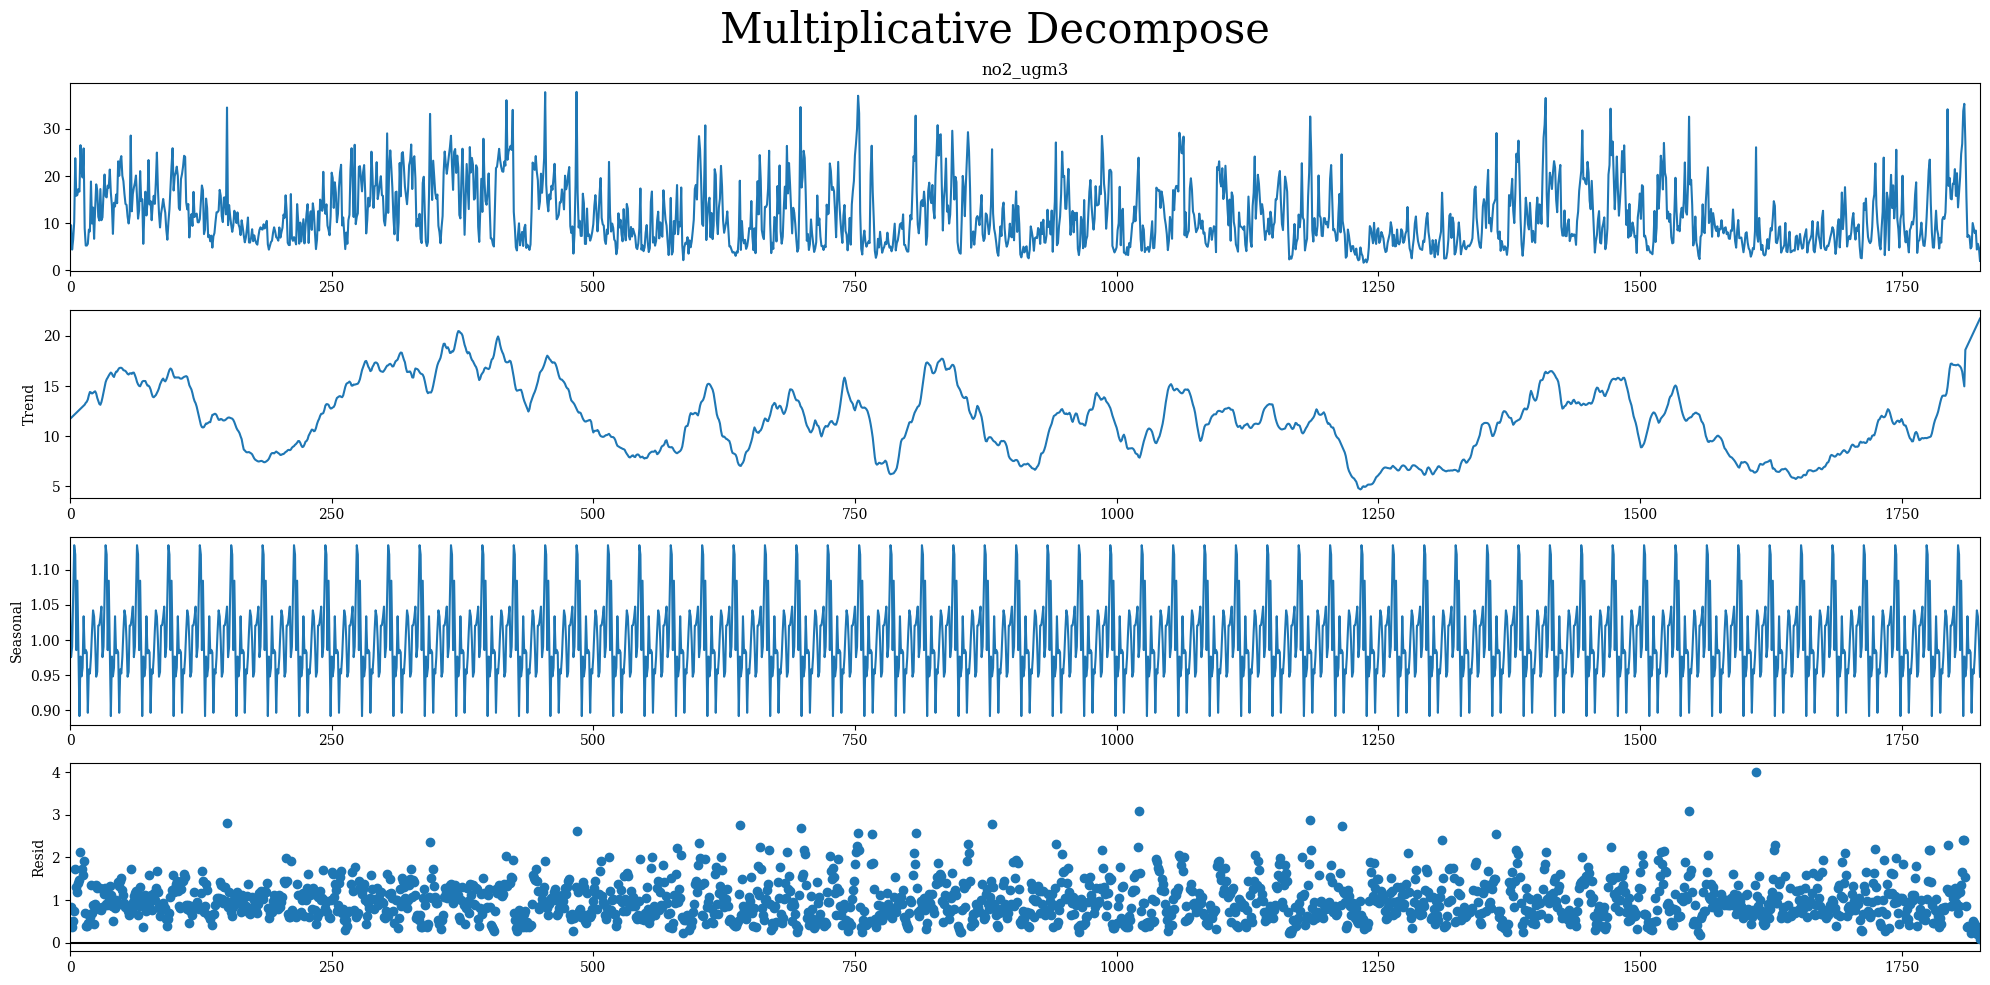

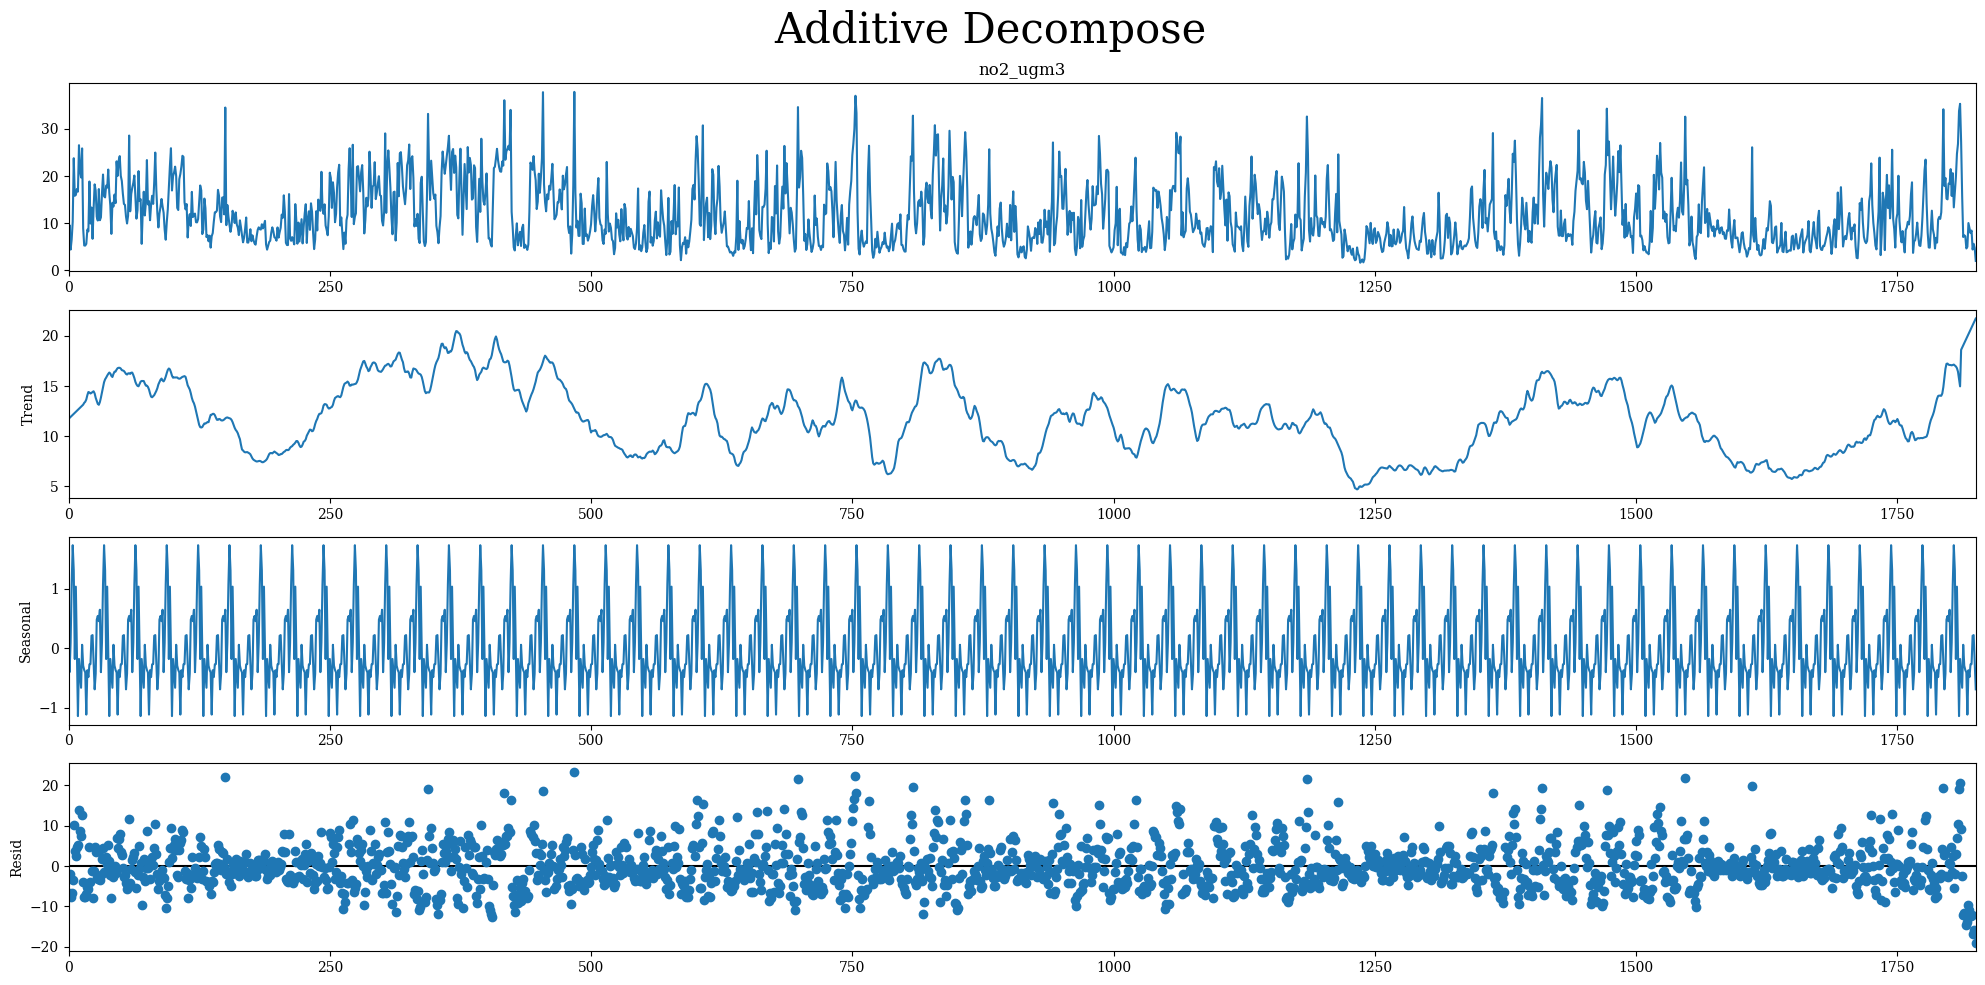

In [204]:
result_mul, result_add = decompose(daily_weather_pollutants[['no2_ugm3', 'con_timestamp']], 'no2_ugm3')

#### visuals shows seasonality / and noise in the variation of no2 concentration

### Seasonality is caused by :
* Winter : temperature inversion
* Spring and Summer: Warmer temperatures and increased sunlight help disperse pollutants, resulting in lower levels of smog and particles. In some cases, warmer temperatures can also promote ground-level ozone formation, a major component of smog, when pollutants from vehicles and industrial sources react with sunlight //  Agricultural activities 
* Autumn: Cooler temperatures --> increase energy consumption for heating--> rise pollution

In [206]:
df_reconstructed

,seasonal,trend,resid,no2_ugm3
0,0.650173,11.726472,-6.769898,5.606747
1,-0.400329,11.827922,-1.851408,9.576184
2,0.100130,11.929371,-7.618824,4.410677
3,1.075216,12.030820,-6.568442,6.537595
4,1.736928,12.132269,-3.570270,10.298927
...,...,...,...,...
1821,-0.263516,20.835597,-12.128298,8.443784
1822,0.212389,21.058275,-16.846736,4.423929
1823,0.223875,21.280954,-15.872733,5.632095
1824,-0.240967,21.503632,-16.516029,4.746635


# Stationarity

Stationarity of time series can be verified by : 
* visuals : seasonality and trend
* statistic operations : mean and std
* unit ROOT, ADF (p value) : 
 - H0: The time series is non-stationary.  p-value > significance level (e.g. α = .05)
       (it has some time-dependent structure and does not have constant variance over time.)
 - HA: The time series is stationary.
   ( the p-value from the test is less < than some significance level (e.g. α = .05))

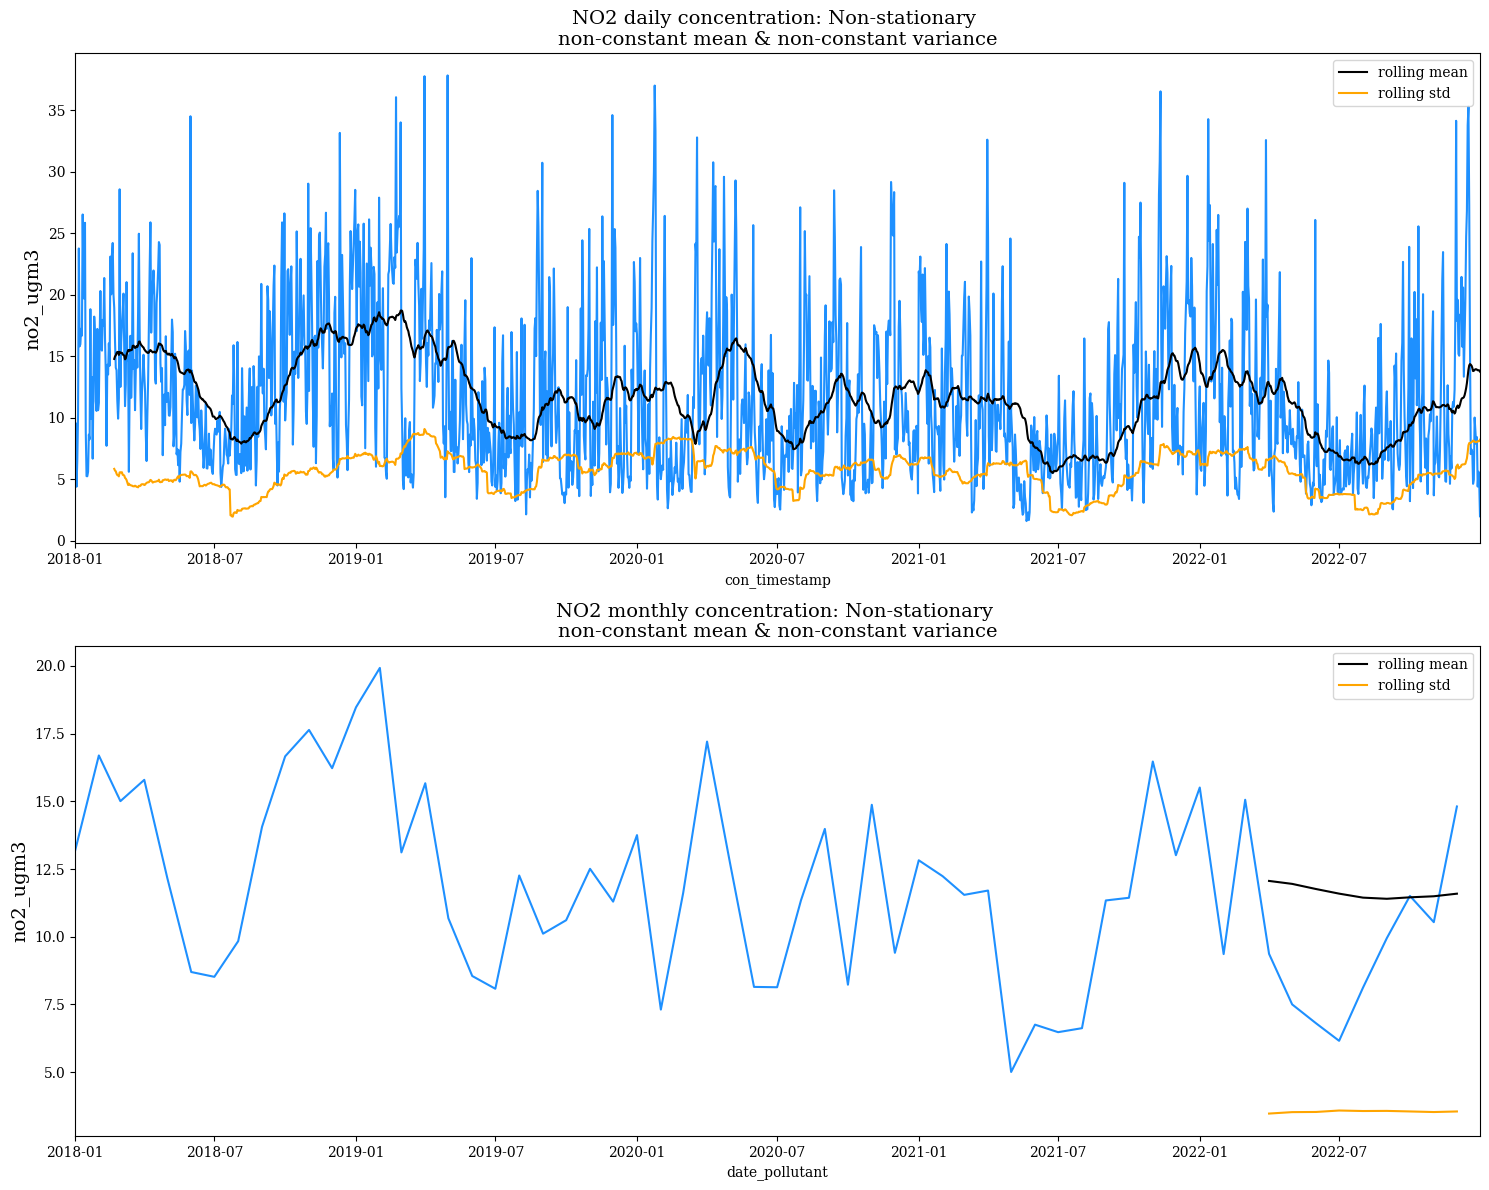

<Figure size 2000x1000 with 0 Axes>

In [209]:
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
# plot daily concentration with rolling mean and std
sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('NO2 daily concentration: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='no2_ugm3', fontsize=14)
ax[0].set_xlim([date(2018, 1, 1), date(2022, 12, 31)])

plt.tight_layout()
plt.show()

- Non stationary time series : times series show variety of mean, var, cov with time change

ADF

In [210]:
result = adfuller(daily_weather_pollutants['no2_ugm3'].values)
result

(-10.966716241774924,
 8.069043826081906e-20,
 5,
 1820,
 {'1%': -3.4339481027788024,
  '5%': -2.8631293617920544,
  '10%': -2.5676161227508754},
 10739.316797693524)

# data transformation for non-stationary time series

transformation by : 
* log
* differencing

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='no2_ugm3_log', ylabel='Density'>

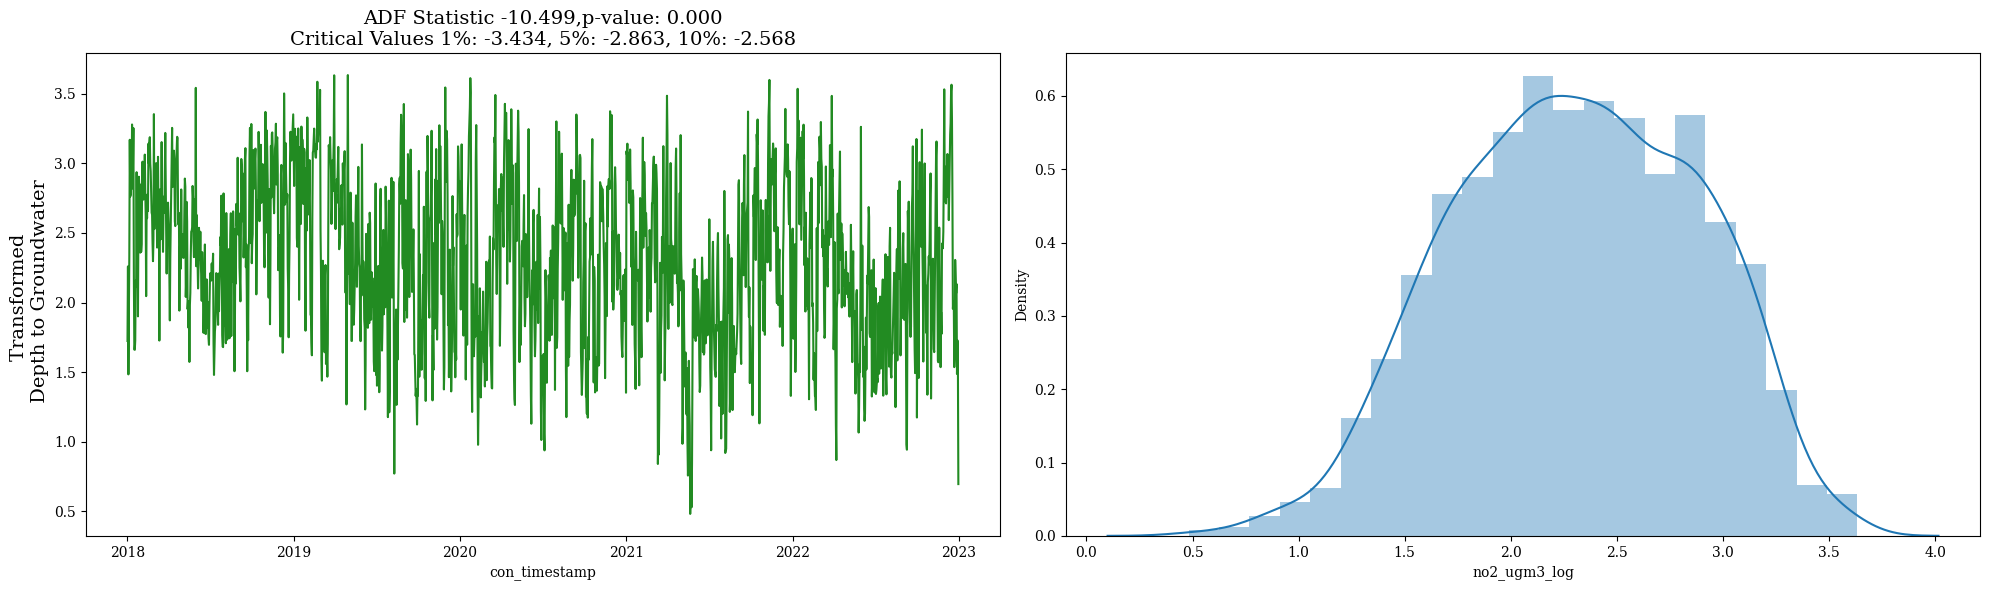

In [215]:
# Transforming data by log
# (Log transoform of negative values will return NaN)
daily_weather_pollutants['no2_ugm3_log'] = np.log(abs(daily_weather_pollutants['no2_ugm3']))
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(daily_weather_pollutants['no2_ugm3_log'], 'Transformed \n Depth to Groundwater', ax[0])
sns.distplot(daily_weather_pollutants['no2_ugm3_log'], ax=ax[1])

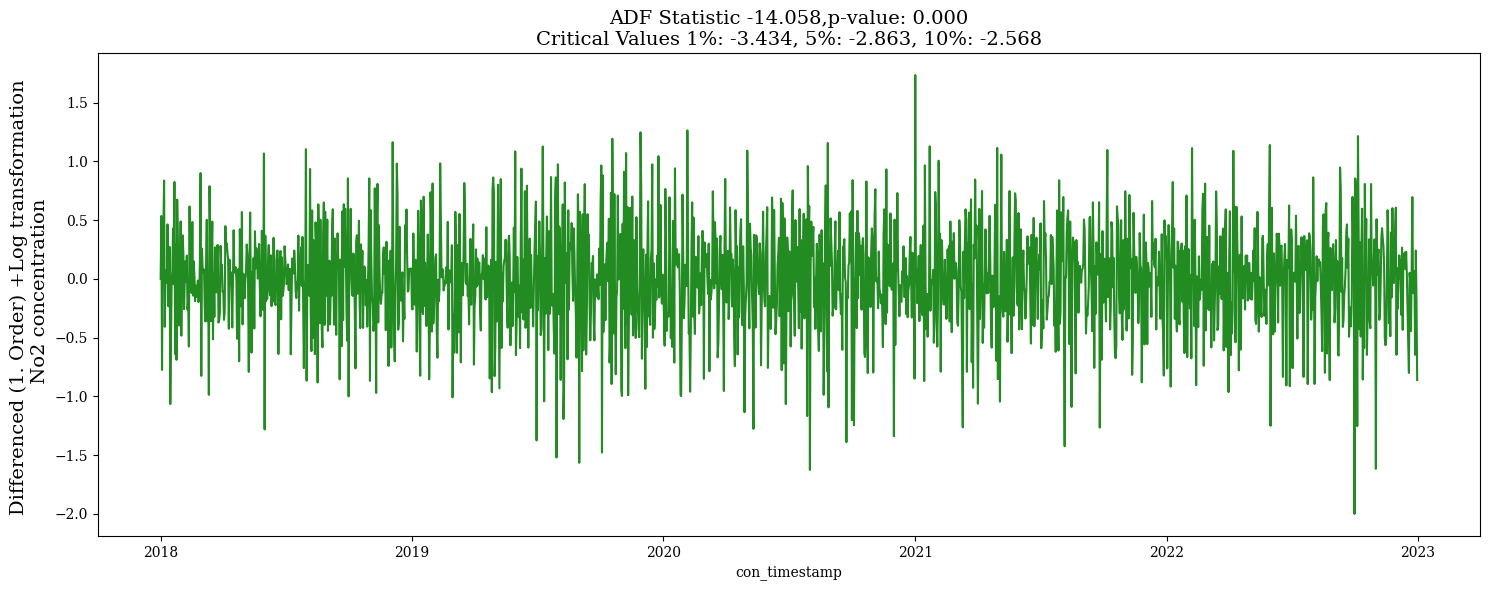

In [216]:
# First Order Differencing for logged values
ts_diff = np.diff(daily_weather_pollutants['no2_ugm3_log'])
daily_weather_pollutants['no2_ugm3_diff_1_log'] = np.append([0], ts_diff)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(daily_weather_pollutants['no2_ugm3_diff_1_log'], 'Differenced (1. Order) +Log transformation \n No2 concentration', ax)

In [ ]:
# First Order Differencing after applying log
ts_diff = np.diff(daily_weather_pollutants['no2_ugm3'])
daily_weather_pollutants['no2_ugm3_diff_1'] = np.append([0], ts_diff)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(daily_weather_pollutants['no2_ugm3_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

In [ ]:
# Second Order Differencing
ts_diff = np.diff(daily_weather_pollutants['no2_ugm3_diff_1'])
daily_weather_pollutants['no2_ugm3_diff_2'] = np.append([0], ts_diff)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
visualize_adfuller_results(daily_weather_pollutants['no2_ugm3_diff_2'], 'Differenced (2. Order) \n No2 concentration', ax)

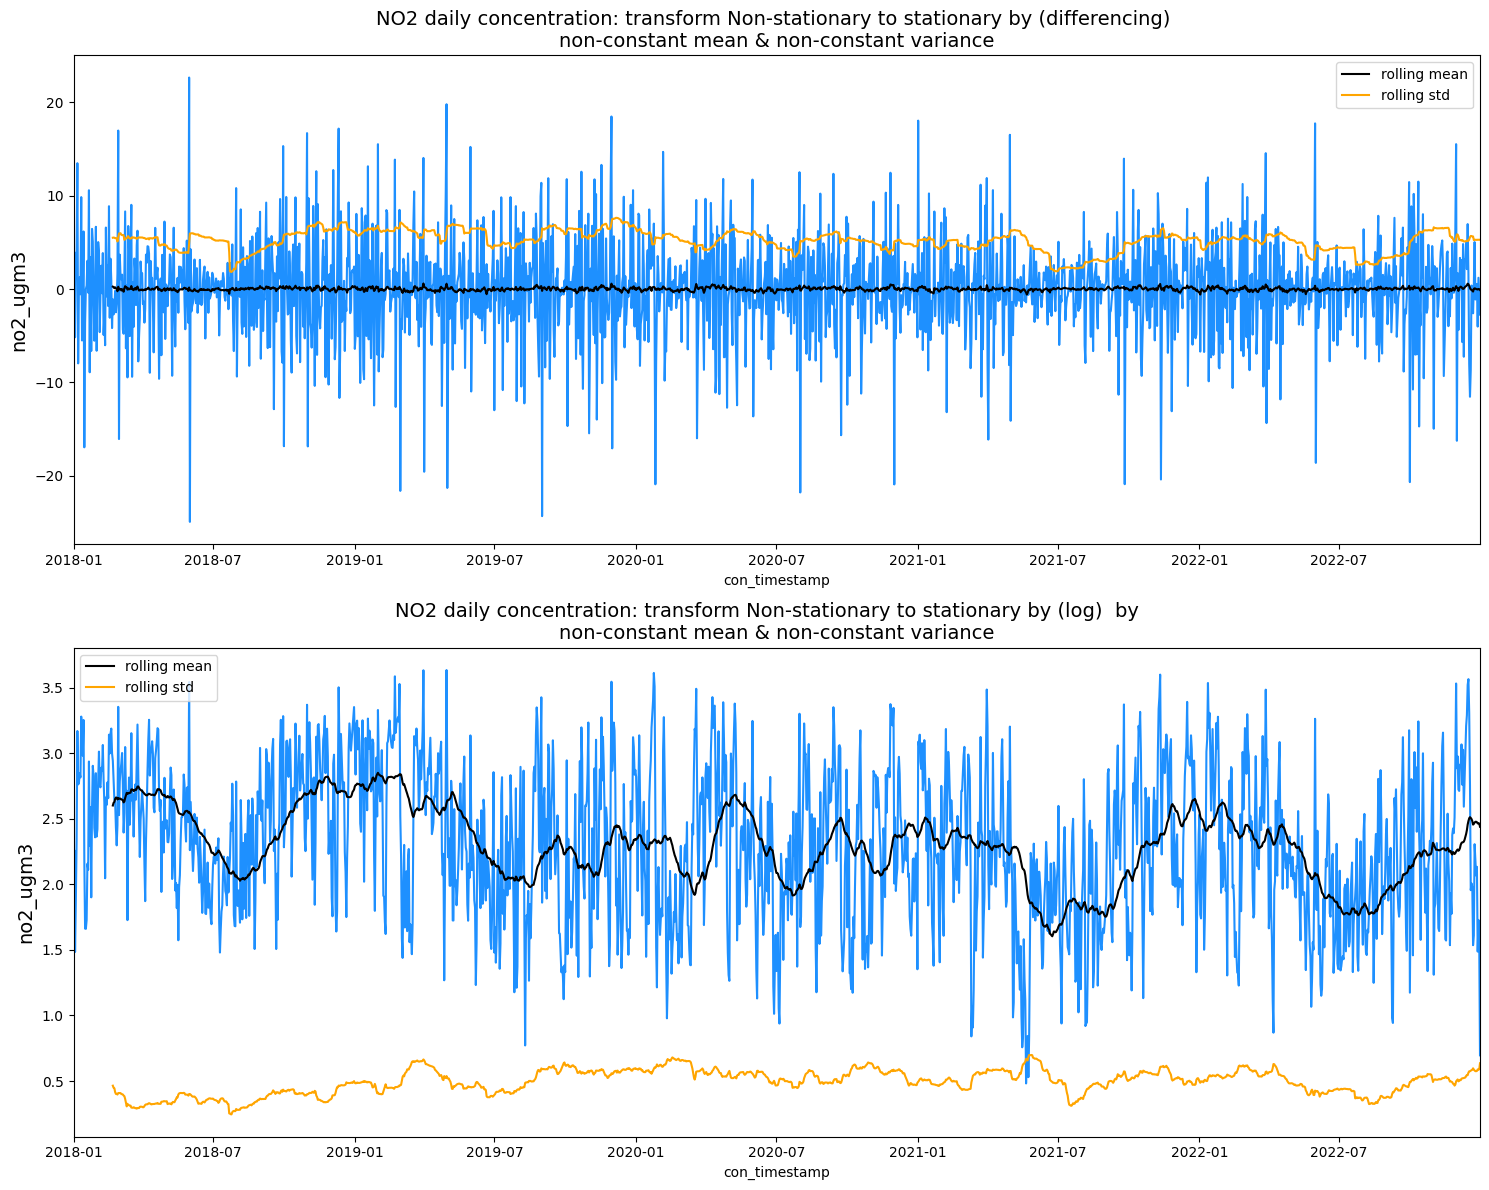

<Figure size 640x480 with 0 Axes>

In [89]:
# plot time series data aftter transformation (diff)
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3_diff_1'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3_diff_1'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3_diff_1'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('NO2 daily concentration: transform Non-stationary to stationary by (differencing) \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='no2_ugm3', fontsize=14)
ax[0].set_xlim([date(2018, 1, 1), date(2022, 12, 31)])

sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3_log'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3_log'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=daily_weather_pollutants['con_timestamp'], y=daily_weather_pollutants['no2_ugm3_log'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('NO2 daily concentration: transform Non-stationary to stationary by (log)  by   \nnon-constant mean & non-constant variance', fontsize=14)
ax[1].set_ylabel(ylabel='no2_ugm3', fontsize=14)
ax[1].set_xlim([date(2018, 1, 1), date(2022, 12, 31)])

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

# forecasting


In [221]:
df = daily_weather_pollutants[["no2_ugm3", "con_timestamp", "no2_ugm3_diff_1" , "no2_ugm3_diff_1_log", "no2_ugm3_diff_2_log", "no2_ugm3_diff_2", "no2_ugm3_log"]]
df['year'] = pd.DatetimeIndex(df['con_timestamp']).year
df['month'] = pd.DatetimeIndex(df['con_timestamp']).month
df['day'] = pd.DatetimeIndex(df['con_timestamp']).day
df['day_of_year'] = pd.DatetimeIndex(df['con_timestamp']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['con_timestamp']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['con_timestamp']).quarter
df['season'] = df['month'] % 12 // 3 + 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [226]:
df

,no2_ugm3,con_timestamp,no2_ugm3_diff_1,no2_ugm3_diff_1_log,no2_ugm3_diff_2_log,no2_ugm3_diff_2,no2_ugm3_log,year,month,day,day_of_year,week_of_year,quarter,season
0,5.606747,2018-01-01,0.000000,0.000000,0.000000,0.000000,1.723971,2018,1,1,1,1,1,1
1,9.576184,2018-01-02,3.969437,0.535308,0.535308,3.969437,2.259279,2018,1,2,2,1,1,1
2,4.410677,2018-01-03,-5.165508,-0.775251,-1.310560,-9.134945,1.484028,2018,1,3,3,1,1,1
3,6.537595,2018-01-04,2.126918,0.393541,1.168792,7.292426,1.877569,2018,1,4,4,1,1,1
4,10.298927,2018-01-05,3.761332,0.454470,0.060929,1.634414,2.332040,2018,1,5,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,8.443784,2022-12-27,0.545373,0.066769,0.187854,1.562067,2.133431,2022,12,27,361,52,4,1
1822,4.423929,2022-12-28,-4.019855,-0.646402,-0.713171,-4.565228,1.487028,2022,12,28,362,52,4,1
1823,5.632095,2022-12-29,1.208166,0.241453,0.887856,5.228021,1.728481,2022,12,29,363,52,4,1
1824,4.746635,2022-12-30,-0.885460,-0.171046,-0.412499,-2.093626,1.557436,2022,12,30,364,52,4,1


### Arima Model (p, d, q) (input data : daily concentrations)
* p (order of autoregression): This is the number of lag observations included in the model. It represents the number of past time steps to consider for predicting the current time step.

* d (degree of differencing): This is the number of times that the raw observations are differenced. Differencing is used to make the time series stationary, which simplifies the modeling process. A stationary time series has a stable mean and variance over time.

* q (order of moving average): This is the size of the moving average window. It represents the number of past forecast errors included in the model. The moving average component helps capture the residual errors that might still exist after the autoregressive and differencing components have been considered.

#### RQ : here i've fixed d to 0, but every time the input change between initial cocentration of no2, transformed values by log or diff

In [227]:
x_train, y_train_log_, x_test, y_test_log_ = split_data('con_timestamp', 'no2_ugm3_log', df)
model_fit = train (y_train_log_, 3,0,1) 
y_pred_log_ = predict(model_fit, y_test_log_)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1552
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -781.673
Date:                Tue, 23 May 2023   AIC                           1575.347
Time:                        13:44:39   BIC                           1607.431
Sample:                             0   HQIC                          1587.279
                               - 1552                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3409      0.074     31.778      0.000       2.197       2.485
ar.L1          1.6509      0.032     51.118      0.000       1.588       1.714
ar.L2         -0.7255      0.043    -16.960      0.0

In [231]:
x_train, y_train, x_test, y_test= split_data('con_timestamp', 'no2_ugm3', df)
model_fit = train(y_train ,3, 0, 1)
y_pred = predict(model_fit, y_test)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1552
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -4656.345
Date:                Tue, 23 May 2023   AIC                           9324.689
Time:                        13:47:02   BIC                           9356.773
Sample:                             0   HQIC                          9336.621
                               - 1552                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1400      1.012     11.992      0.000      10.156      14.124
ar.L1          1.6084      0.028     57.694      0.000       1.554       1.663
ar.L2         -0.6484      0.038    -16.904      0.0

In [235]:
x_train, y_train_diff_1, x_test, y_test_diff_1 = split_data('con_timestamp', 'no2_ugm3_diff_1', df)
model_fit = train(y_train_diff_1,  1, 0, 1)
y_pred_diff_1 =predict(model_fit, y_test_diff_1)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1552
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4661.556
Date:                Tue, 23 May 2023   AIC                           9331.112
Time:                        13:48:40   BIC                           9352.501
Sample:                             0   HQIC                          9339.067
                               - 1552                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.010     -0.031      0.975      -0.020       0.020
ar.L1          0.6160      0.019     31.746      0.000       0.578       0.654
ma.L1         -0.9743      0.007   -141.804      0.0

In [237]:
x_train, y_train_diff_1_log, x_test, y_test_diff_1_log = split_data('con_timestamp', 'no2_ugm3_diff_1_log', df)
model_fit = train( y_train_diff_1_log ,1, 0, 1)
y_pred_diff_1_log = predict(model_fit, y_test_diff_1_log)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1552
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -789.085
Date:                Tue, 23 May 2023   AIC                           1586.171
Time:                        13:50:17   BIC                           1607.560
Sample:                             0   HQIC                          1594.125
                               - 1552                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.275e-05      0.001     -0.071      0.943      -0.002       0.001
ar.L1          0.6515      0.021     30.737      0.000       0.610       0.693
ma.L1         -0.9754      0.006   -150.397      0.0

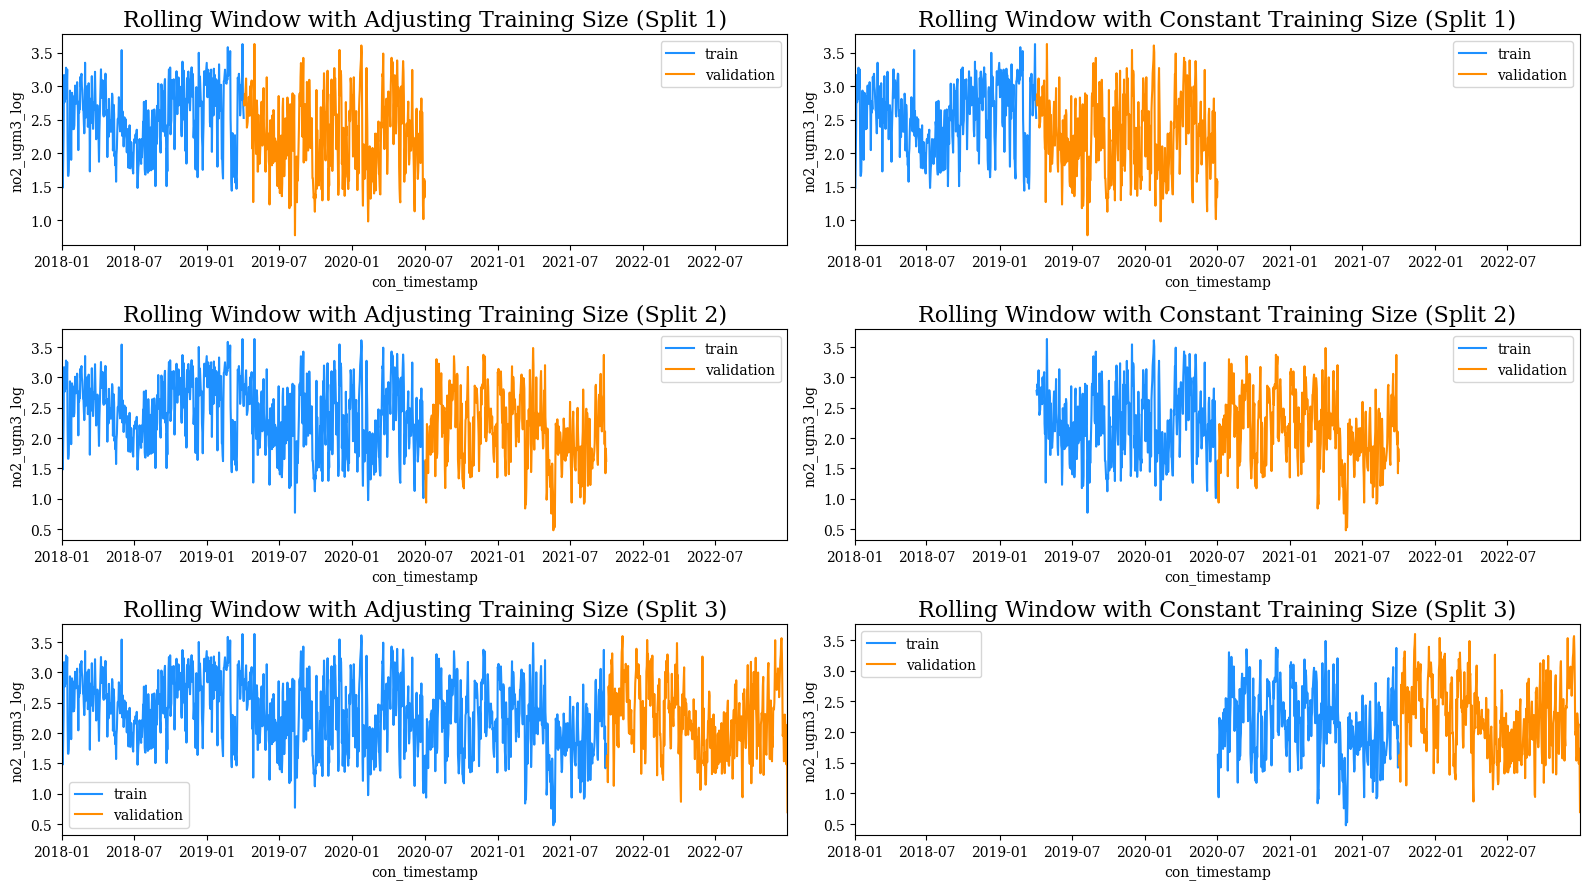

In [192]:
N_SPLITS = 3
X = df['con_timestamp']
y = df['no2_ugm3_log']
folds = TimeSeriesSplit(n_splits=N_SPLITS)

f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, test_index) in enumerate(folds.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_test):(len(X_train) - len(X_test) + len(X_test))], 
        y=y_train[len(X_train) - len(X_test):(len(X_train) - len(X_test) + len(X_test))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_test, y= y_test, ax=ax[i, j], color='darkorange', label='validation')
        ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
        ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)
for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2018, 1, 1), date(2022, 12, 31)])
    ax[i, 1].set_xlim([date(2018, 1, 1), date(2022, 12, 31)])
    
plt.tight_layout()
plt.show()

### Auto Arima (input data : daily concentrations)

In [180]:
model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9513.694, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12550.448, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9559.247, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11226.848, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9333.469, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9532.209, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9334.176, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=9334.063, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=9426.238, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9490.525, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=9337.443, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9330.744, Time=1.61 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9345.387, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9345.403, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] interce

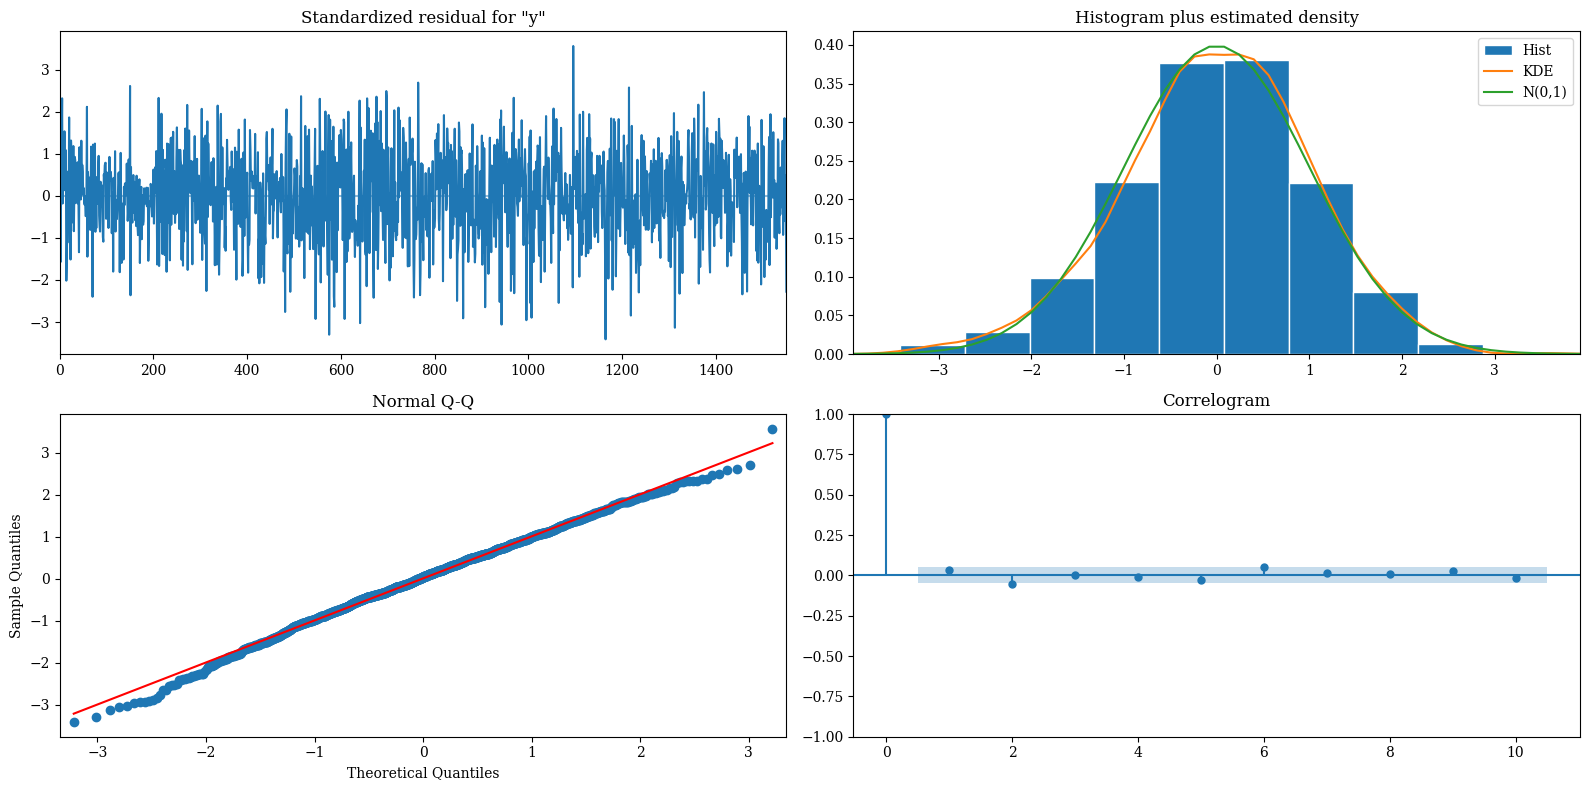

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [239]:
# here we will focus on monthly concentrations
data = monthly_weather_pollutants[["date_pollutant", "NO2_avg_ugm3"]]
data

,date_pollutant,NO2_avg_ugm3
0,2018-01-01,13.158893
1,2018-02-01,16.694029
2,2018-03-01,15.007208
3,2018-04-01,15.794204
4,2018-05-01,12.160416
5,2018-06-01,8.698691
6,2018-07-01,8.521395
7,2018-08-01,9.838708
8,2018-09-01,14.063397
9,2018-10-01,16.662189


### Sarimax (input data : monthly concentrations)

In [241]:
TEST_SIZE = 15
data_no2_ugm3 = data[["NO2_avg_ugm3"]] 
train, test = data_no2_ugm3.iloc[:-TEST_SIZE], data_no2_ugm3.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data_no2_ugm3.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((45, 1), (45,), (15, 1), (15,))

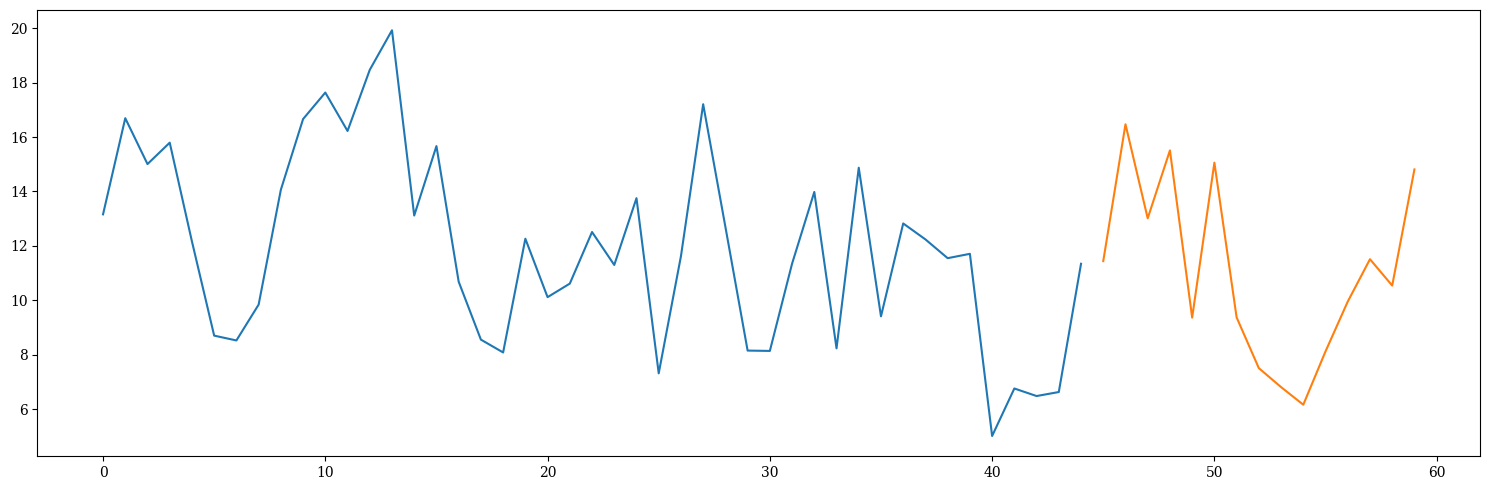

In [242]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [243]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=4,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=250.928, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=235.955, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=249.795, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=245.125, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=223.413, Time=0.08 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=224.778, Time=0.16 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=227.741, Time=0.05 sec
 ARIMA(2,0,0)(2,1,0)[4] intercept   : AIC=225.342, Time=0.09 sec
 ARIMA(1,0,1)(2,1,0)[4] intercept   : AIC=225.363, Time=0.11 sec
 ARIMA(0,0,1)(2,1,0)[4] intercept   : AIC=224.724, Time=0.08 sec
 ARIMA(2,0,1)(2,1,0)[4] intercept   : AIC=227.261, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[4]             : AIC=222.746, Time=0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   45
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 4)   Log Likelihood                -107.373
Date:                           Tue, 23 May 2023   AIC                            222.746
Time:                                   13:56:22   BIC                            229.600
Sample:                                        0   HQIC                           225.242
                                            - 45                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4603      0.175      2.637      0.008       0.118       0.802
ar.S.L4       -0.7538      0.162     -4.651      0.000      -1.071      -0.436
ar.S.L8       -0.5875      0.127     -4.609      0.000      -0.837      -0.338
sigma2         9.8570      2.682      3.675      0.000       4.601      15.113
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.62   Prob(JB):                         0.65
Heteroskedasticity (H):               1.28   Skew:                            -0.14
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [245]:
# Forecast
prediction, confint = smodel.predict(n_periods=TEST_SIZE, return_conf_int=True)
prediction


45     8.423714
46    12.201928
47     9.081243
48    11.148139
49    10.381318
50    10.862931
51    10.214032
52     7.572755
53     7.925225
54     8.509262
55     7.917079
56    10.381016
57     8.626492
58    11.069947
59     8.982946
dtype: float64

In [246]:
cf= pd.DataFrame(confint)

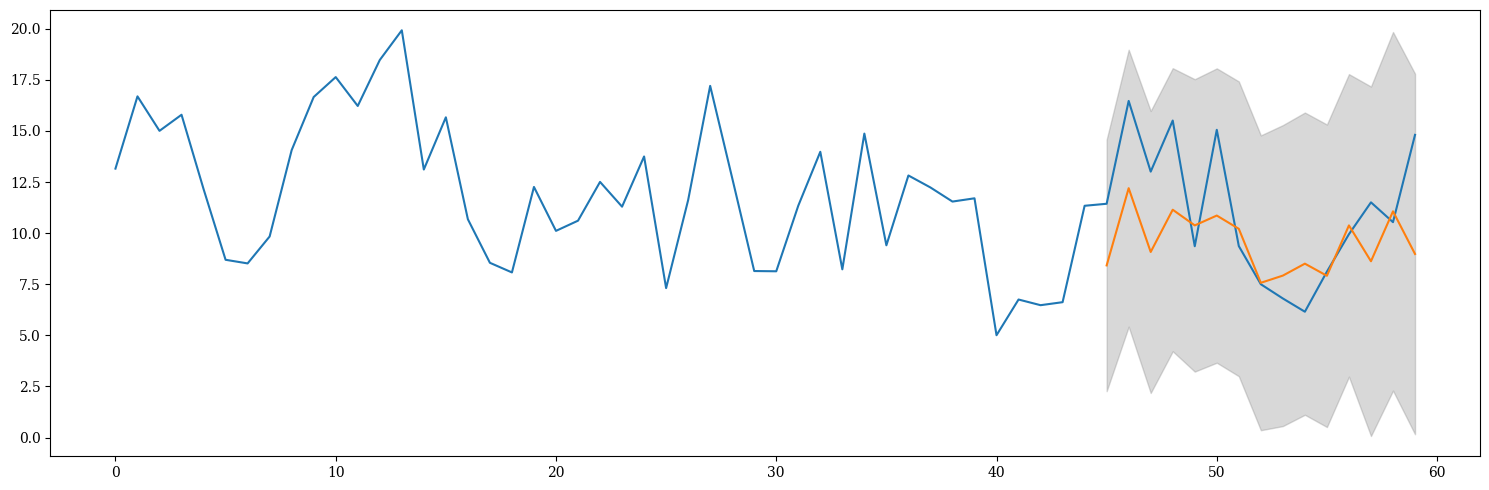

In [253]:
plot_predictions(prediction, cf)

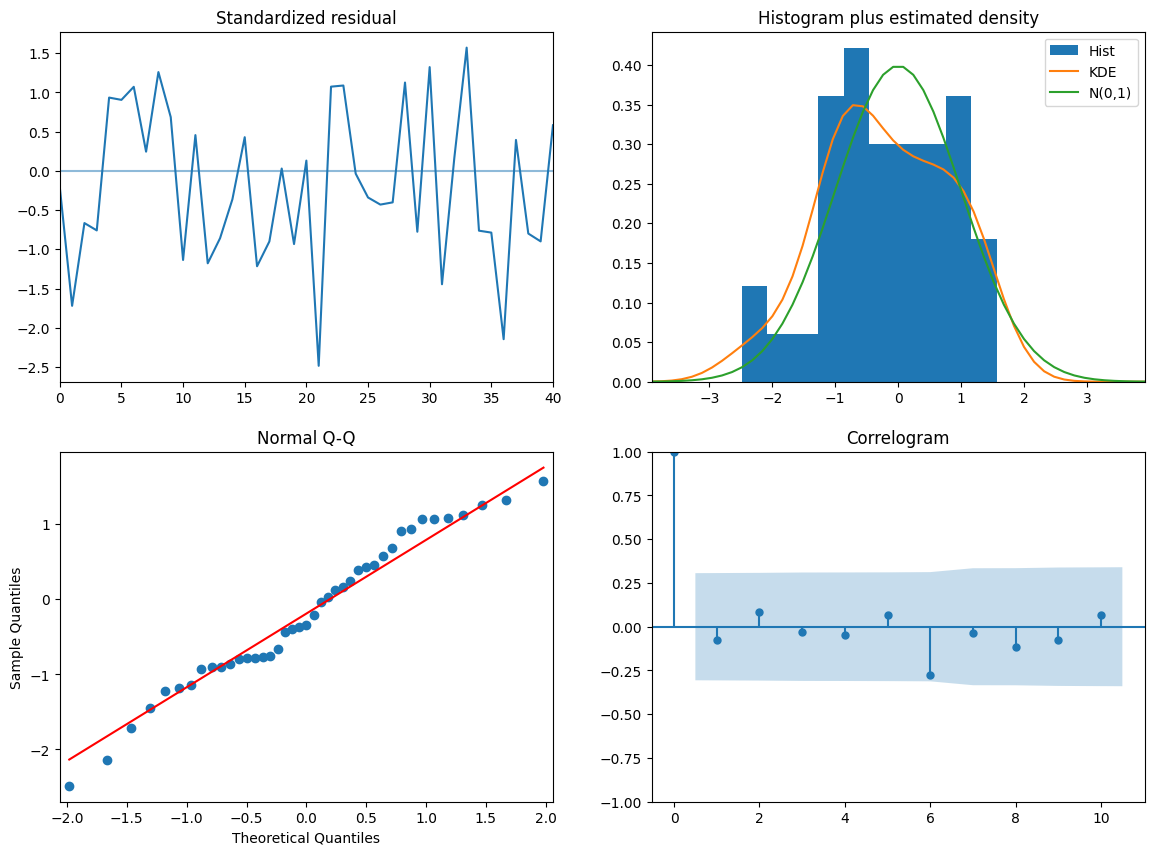

In [60]:
smodel.plot_diagnostics(figsize=(14,10))
plt.show()